In [47]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [48]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [49]:
path='/content/gdrive/My Drive/Card-recommend/샘플데이터'
os.listdir(path)

['내국인(블록)_일자별시간대별.csv',
 '내국인(집계구)_성별연령대별.csv',
 '내국인(집계구)_유입지별.csv',
 '신한카드_내국인_63업종_코드.csv',
 '신한카드_외국인_56업종_코드.csv',
 '외국인관광(블록)_일자별시간대별.csv',
 '외국인관광객(집계구)_국가별.csv']

In [50]:
UPJONG_Df=pd.read_csv(os.path.join(path, '내국인(집계구)_성별연령대별.csv'), encoding='utf-8')
UPJONG_Df.head()

,TOT_REG_CD(가맹점집계구코드),SB_UPJONG_CD(내국인업종코드),TS_YM(기준년월),TS_YMD(일별),PSN_CPR(개인법인구분),SEX_CCD(성별),AGE_GB(연령대별),AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수)
0,1101053010006,SB001,201812,20181201,개인,F,20대,9999,9999.999
1,1101053010006,SB001,201812,20181201,개인,F,30대,9999,9999.999
2,1101053010006,SB001,201812,20181201,개인,F,40대,9999,9999.999
3,1101053010006,SB001,201812,20181201,개인,F,50대,9999,9999.999
4,1101053010006,SB001,201812,20181201,개인,M,20대,9999,9999.999


In [51]:
sectorCodeDf=pd.read_csv(os.path.join(path, '신한카드_내국인_63업종_코드.csv'), encoding='utf-8')
sectorCodeDf['SB_UPJONG_CD(내국인업종코드)'] = sectorCodeDf['SB_UPJONG_CD(내국인업종코드)'].str.upper()
sectorCodeDf.head()

,SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류),SB_UPJONG_CD(내국인업종코드)
0,요식/유흥,한식,한식,SB001
1,요식/유흥,일식/중식/양식,일식,SB002
2,요식/유흥,일식/중식/양식,양식,SB003
3,요식/유흥,일식/중식/양식,중식,SB004
4,요식/유흥,제과/커피/패스트푸드,제과점,SB005


In [52]:
UPJONG_Df=pd.merge(UPJONG_Df, sectorCodeDf, how='left', on='SB_UPJONG_CD(내국인업종코드)')
UPJONG_Df.head()


,TOT_REG_CD(가맹점집계구코드),SB_UPJONG_CD(내국인업종코드),TS_YM(기준년월),TS_YMD(일별),PSN_CPR(개인법인구분),SEX_CCD(성별),AGE_GB(연령대별),AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수),SB_L_UPJONG_NM(대분류_13분류),SB_M_UPJONG_NM(중분류_30분류),SB_UPJONG_NM(소분류_63분류)
0,1101053010006,SB001,201812,20181201,개인,F,20대,9999,9999.999,요식/유흥,한식,한식
1,1101053010006,SB001,201812,20181201,개인,F,30대,9999,9999.999,요식/유흥,한식,한식
2,1101053010006,SB001,201812,20181201,개인,F,40대,9999,9999.999,요식/유흥,한식,한식
3,1101053010006,SB001,201812,20181201,개인,F,50대,9999,9999.999,요식/유흥,한식,한식
4,1101053010006,SB001,201812,20181201,개인,M,20대,9999,9999.999,요식/유흥,한식,한식


In [53]:
UPbig_Df=UPJONG_Df.pivot_table(index=['SB_L_UPJONG_NM(대분류_13분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
UPbig_Df

,AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수)
SB_L_UPJONG_NM(대분류_13분류),,
가전/가구,1079892,1.080000e+06
가정생활/서비스,279972,2.800000e+05
교육/학원,689931,6.899999e+05
미용,119988,1.200000e+05
스포츠/문화/레저,2209779,2.210000e+06
여행/교통,29997,3.000000e+04
요식/유흥,13588641,1.359000e+07
유통,11178882,1.118000e+07
음/식료품,5179482,5.179999e+06


In [58]:
# UPmid_Df=UPJONG_Df.pivot_table(index=['SB_L_UPJONG_NM(대분류_13분류)','SB_M_UPJONG_NM(중분류_30분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
UPmid_Df=UPJONG_Df.pivot_table(index=['SB_M_UPJONG_NM(중분류_30분류)'],values=['AMT_CORR(카드이용금액계)','USECT_CORR(카드이용건수)'],aggfunc='sum')
UPmid_Df

,AMT_CORR(카드이용금액계),USECT_CORR(카드이용건수)
SB_M_UPJONG_NM(중분류_30분류),,
가전/가구,1079892,1079999.892
교육용품,329967,329999.967
기타요식,3549645,3549999.645
미용서비스,119988,119999.988
병원,3439656,3439999.656
서비스,269973,269999.973
숙박,29997,29999.997
스포츠/문화/레저,809919,809999.919
스포츠/문화/레저용품,1399860,1399999.860


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_

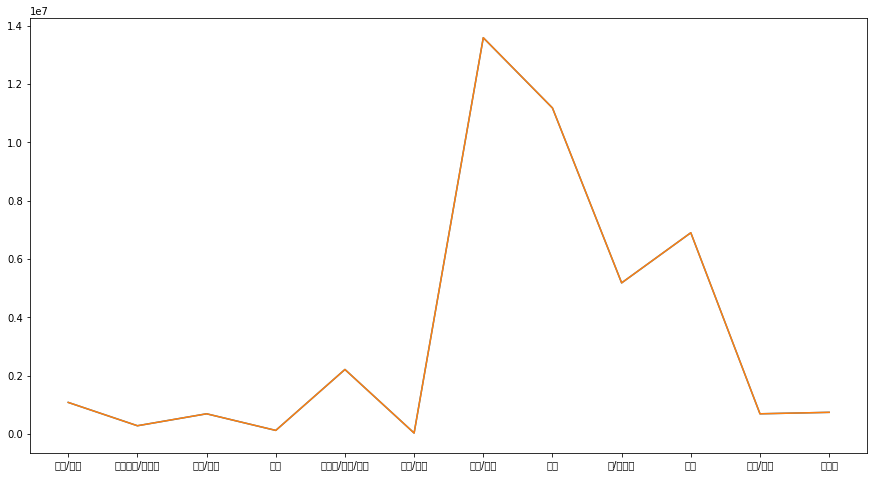

In [62]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(15,8))
plt.plot(UPbig_Df)

# UPbig_Df.T.plot(axis=0)
# plt.rcParams["figure.figsize"] = (10,7)
# plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_

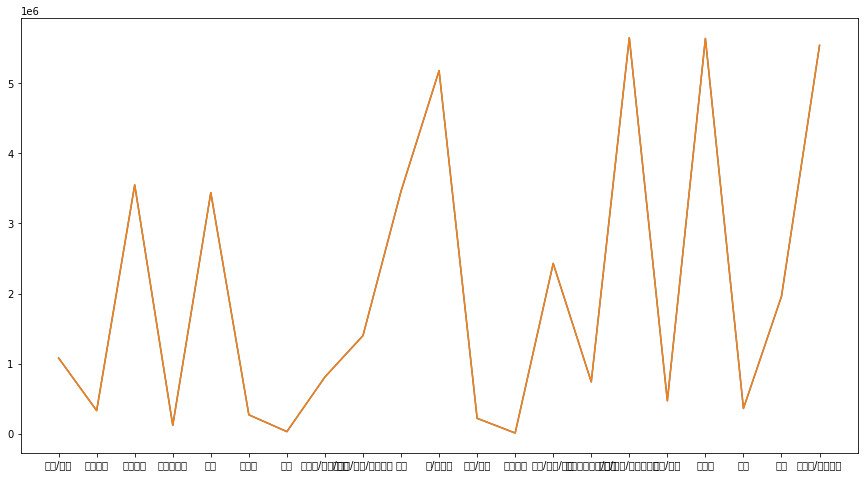

In [59]:
plt.figure(figsize=(15,8))
plt.plot(UPmid_Df)